In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from pathlib import Path
from re import compile as cp
from calendar import month_abbr
from os import mkdir, path

In [99]:
if not path.exists('dados/radar/stds'):
    mkdir('dados/radar/stds')

if not path.exists('dados/tidi/stds'):
    mkdir('dados/tidi/stds')

In [100]:
dict_number_month = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

dict_months = {
    '01': [1, 31],
    '02': [32, 59],
    '03': [60, 90],
    '04': [91, 120],
    '05': [121, 151],
    '06': [152, 181],
    '07': [182, 212],
    '08': [213, 243],
    '09': [244, 273],
    '10': [274, 304],
    '11': [305, 334],
    '12': [335, 365],
}

dict_day_to_month = { i:k  for k,v in zip(dict_months.keys(), dict_months.values()) for i in range(v[0], v[1]+1)}

## Criando arquivos std TIDI

In [121]:
dir_ventos = ['zonal', 'meridional']
caminhos_tidi = [ Path('dados/tidi/dados_'+path+'/') for path in dir_ventos]
arquivos_tidi = sorted([i for caminho in caminhos_tidi for i in caminho.glob('*.txt')])

In [122]:
compilado = cp('[a-z]|[A-Z]')
ano = cp('\d\d\d\d')

In [123]:
ucolunas = ['tempo_decorrido', '90.0km', 'std_90.0km']

cabe = ['tempo', '90', '90_std']

In [124]:
l_dfs = []

for i in arquivos_tidi:
    print(i)
    df = pd.read_csv(i, sep=';', usecols=ucolunas)
    nome_arquivo = str(i)
    dia = nome_arquivo[-7:-4]
    mes = dict_day_to_month[int(dia)]
    ano = nome_arquivo[-14:-10]

    dia_convertido = str(int(dia) - (dict_months[mes][0] - 1))
    dia_convertido = '0'+dia_convertido if len(dia_convertido) == 1 else dia_convertido
    
    # df_res = df.sort_values(by='tempo_decorrido').iloc[int(df.shape[0]/2)].to_frame().T
    df_res = df.sort_values(by='tempo_decorrido').mean().to_frame().T
    df_res.columns = cabe
    # df_res['90_std'] = df['90.0km'].std()
    df_res['dia'] = ano + '-' + mes + '-' + dia_convertido
    df_res['tipo_vento'] = 'meridional' if 'meridional' in nome_arquivo else 'zonal'

    l_dfs.append(df_res) 


nome_arquivo_final = 'dados_meridional_zonal_tidi'
df_final = pd.concat(l_dfs)
df_final.to_string(f'dados/tidi/stds/'+nome_arquivo_final+'.txt', index=False)

dados\tidi\dados_meridional\dados_meridional_200501_001.txt
dados\tidi\dados_meridional\dados_meridional_200501_002.txt
dados\tidi\dados_meridional\dados_meridional_200501_003.txt
dados\tidi\dados_meridional\dados_meridional_200501_004.txt
dados\tidi\dados_meridional\dados_meridional_200501_005.txt
dados\tidi\dados_meridional\dados_meridional_200501_006.txt
dados\tidi\dados_meridional\dados_meridional_200501_007.txt
dados\tidi\dados_meridional\dados_meridional_200501_008.txt
dados\tidi\dados_meridional\dados_meridional_200501_009.txt
dados\tidi\dados_meridional\dados_meridional_200501_010.txt
dados\tidi\dados_meridional\dados_meridional_200501_011.txt
dados\tidi\dados_meridional\dados_meridional_200501_012.txt
dados\tidi\dados_meridional\dados_meridional_200501_013.txt
dados\tidi\dados_meridional\dados_meridional_200501_014.txt
dados\tidi\dados_meridional\dados_meridional_200501_015.txt
dados\tidi\dados_meridional\dados_meridional_200501_016.txt
dados\tidi\dados_meridional\dados_meridi

In [125]:
df_final

,tempo,90,90_std,dia,tipo_vento
0,11.288865,25.696225,10.975514,2005-01-01,meridional
0,10.609812,-5.329384,9.349565,2005-01-02,meridional
0,10.186539,-0.972483,9.525720,2005-01-03,meridional
0,8.336257,22.362295,9.669306,2005-01-04,meridional
0,11.093573,-12.663546,8.997178,2005-01-05,meridional
...,...,...,...,...,...
0,12.342083,-42.859315,17.533772,2006-12-27,zonal
0,11.386323,7.855800,17.136479,2006-12-28,zonal
0,13.762164,-28.220741,17.096315,2006-12-29,zonal
0,11.288704,-62.259547,16.144727,2006-12-30,zonal


## Criando arquivos std Skiymet

In [126]:
caminho_ski = Path('dados/radar/VentoSJC')
arquivos_ski = sorted([i for i in caminho_ski.glob('*.txt')])

In [127]:
compilado = cp('[a-z]|[A-Z]')
ano_ = cp('\d\d\d\d')

In [128]:
ucolunas = [0, 4, 11]

cabe = ['tempo', '90', '90_std']

meios = []

for i in arquivos_ski:
    df = pd.read_csv(i, sep='\s+',skiprows=[0], usecols=ucolunas, names=cabe)
    nome = ''.join(compilado.findall(str(i)))
    anos = ''.join(ano_.findall(str(i)))
    ano = anos[:4]
    mes = (anos[4:6])
    inicio = 0
    fim = 24

    while inicio <= len(df)-1:
        # laco = df[inicio:fim].iloc[int(df[inicio:fim].shape[0]/2)].to_frame().T
        laco = df[inicio:fim].mean().to_frame().T

        dia_convertido = str(int(laco['tempo']) - (dict_months[mes][0] - 1))
        dia_convertido = '0'+dia_convertido if len(dia_convertido) == 1 else dia_convertido

        laco.columns = cabe
        # laco['90_std'] = df[inicio:fim]['90'].std()
        laco['dia'] = ano + '-' + mes + '-' + dia_convertido
        laco['tipo_vento'] = 'meridional' if 'Meridional' in str(i) else 'zonal'

        meios.append(laco)
        inicio = fim
        fim+=24
        
nome_arquivo_final = 'dados_meridional_zonal_skiymet'
df_final = pd.concat(meios)

df_final.to_string(f'dados/radar/stds/'+nome_arquivo_final+'.txt', index=False)

In [129]:
df_final

,tempo,90,90_std,dia,tipo_vento
0,1.480000,14.529583,0.467917,2005-01-01,meridional
0,2.480000,3.491500,0.454000,2005-01-02,meridional
0,3.480000,0.353333,0.775417,2005-01-03,meridional
0,4.480000,27.308333,0.441667,2005-01-04,meridional
0,5.480000,-26.693478,0.875217,2005-01-05,meridional
...,...,...,...,...,...
0,361.521667,-21.914583,0.421250,2006-12-27,zonal
0,362.521667,11.183750,0.501667,2006-12-28,zonal
0,363.521667,-22.056667,0.439583,2006-12-29,zonal
0,364.521667,-9.241250,0.340000,2006-12-30,zonal


## Plot lines

In [130]:
df_tidi = pd.read_csv('dados/tidi/stds/dados_meridional_zonal_tidi.txt', sep='\s+')
df_skiymet = pd.read_csv('dados/radar/stds/dados_meridional_zonal_skiymet.txt', sep='\s+')

In [131]:
df_tidi['tipo'] = 'TIDI'
df_skiymet['tipo'] = 'SKiYMET'

df = pd.concat([df_tidi, df_skiymet])

In [132]:
df[['tipo_vento', 'tipo']].value_counts()

tipo_vento  tipo   
meridional  TIDI       727
zonal       TIDI       727
meridional  SKiYMET    692
zonal       SKiYMET    692
dtype: int64

In [133]:
###TODO
# alterar X para nome do mes
# adicionar legenda 
# adicionar x,y titulo
# fazer 4 graficos: 2005-Merid, 2005-Zonal, 2006-Merid, 2005-Zonal  

In [139]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import numpy as np

def multiplot_errorbars_winds(df, year, tipo_vento, titulo):
    fig, ax = plt.subplots(1, 1, figsize=(16,8))

    df_plot = df[(df.dia>=year+'-01-01') & (df.dia <= year+'-12-31')]

    x1 = pd.to_datetime(df_plot[(df_plot['tipo']=='TIDI')&(df_plot['tipo_vento']==tipo_vento)]['dia'])
    y1 = df_plot[(df_plot['tipo']=='TIDI')&(df_plot['tipo_vento']==tipo_vento)]['90']
    e1 = df_plot[(df_plot['tipo']=='TIDI')&(df_plot['tipo_vento']==tipo_vento)]['90_std']

    x2 = pd.to_datetime(df_plot[(df_plot['tipo']=='SKiYMET')&(df_plot['tipo_vento']==tipo_vento)]['dia'])
    y2 = df_plot[(df_plot['tipo']=='SKiYMET')&(df_plot['tipo_vento']==tipo_vento)]['90']
    e2 = df_plot[(df_plot['tipo']=='SKiYMET')&(df_plot['tipo_vento']==tipo_vento)]['90_std']

    ax.errorbar(x1, y1, e1, linestyle='None', marker='*', color='red', markersize=8, label='TIDI')
    ax.errorbar(x2, y2, e2, linestyle='-', marker='o', color='blue', label='SKiYMET')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_xlabel(year, fontsize=16)
    ax.set_ylabel('vento '+tipo_vento+' (m/s)', fontsize=16)
    ax.legend(loc='lower right')

    plt.xlim([datetime.date(int(year), 1, 1), datetime.date(int(year), 12, 31)])
    plt.ylim(-100, 100)

    plt.savefig(f'dados/radar/figuras/{titulo}.png')
    plt.show()

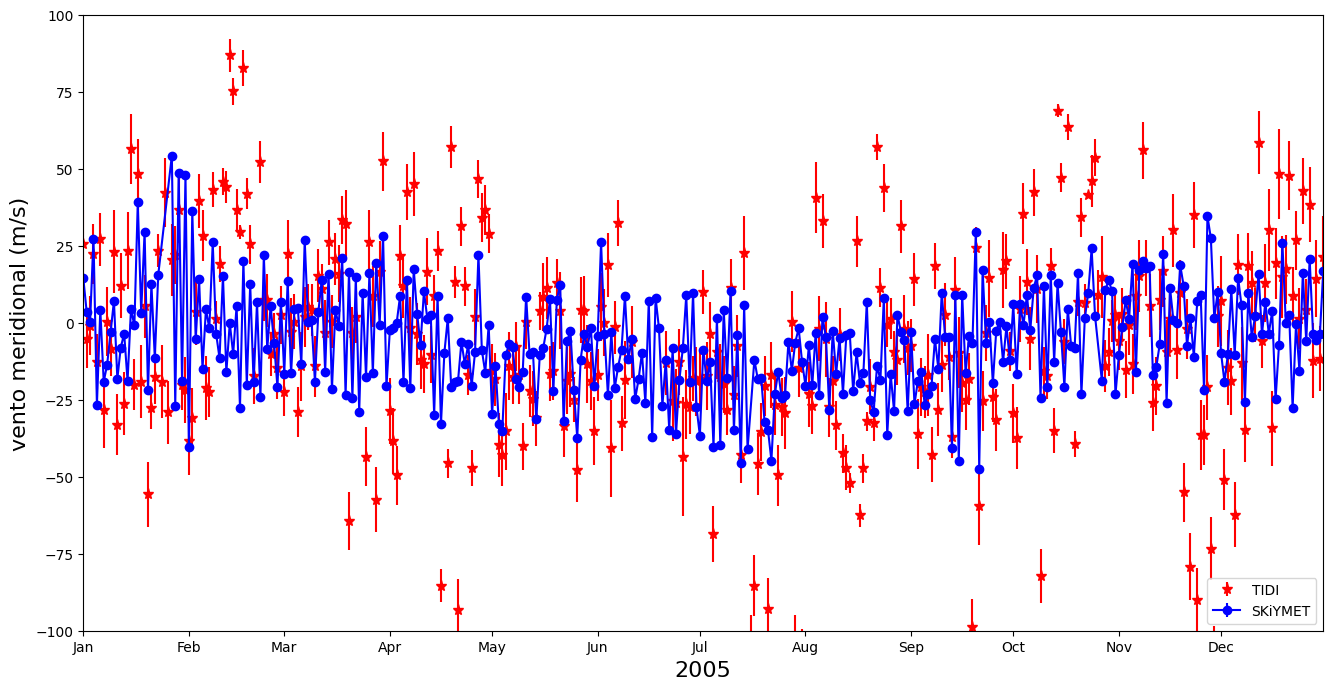

In [140]:
multiplot_errorbars_winds(df, '2005', 'meridional', 'comparacao_tidi_skiymet_meridional_2005')

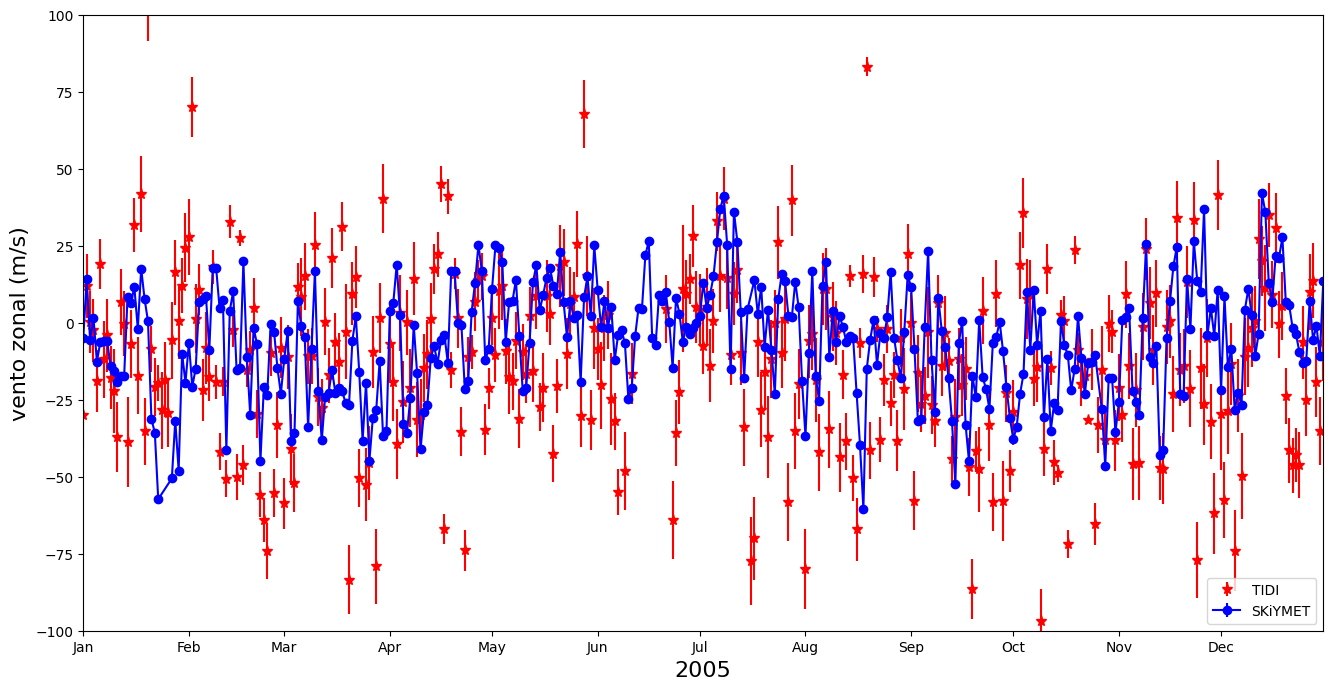

In [141]:
multiplot_errorbars_winds(df, '2005', 'zonal', 'comparacao_tidi_skiymet_zonal_2005')

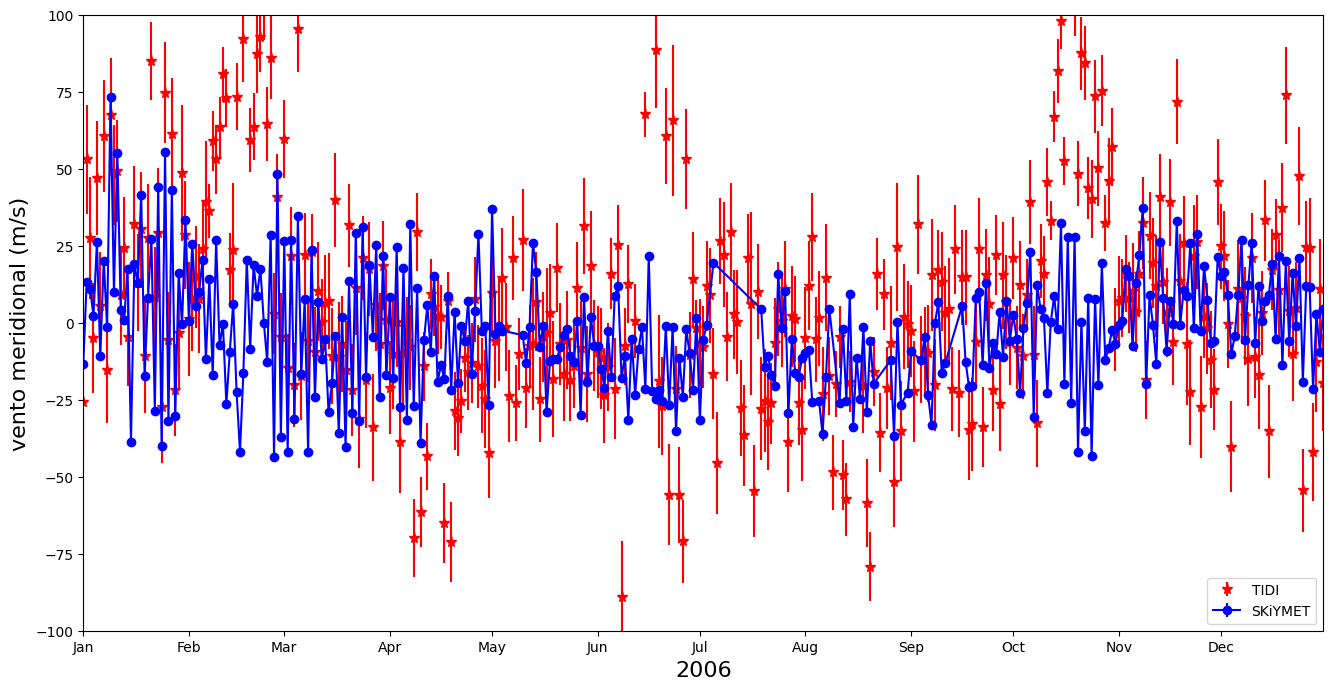

In [142]:
multiplot_errorbars_winds(df, '2006', 'meridional', 'comparacao_tidi_skiymet_meridional_2006')

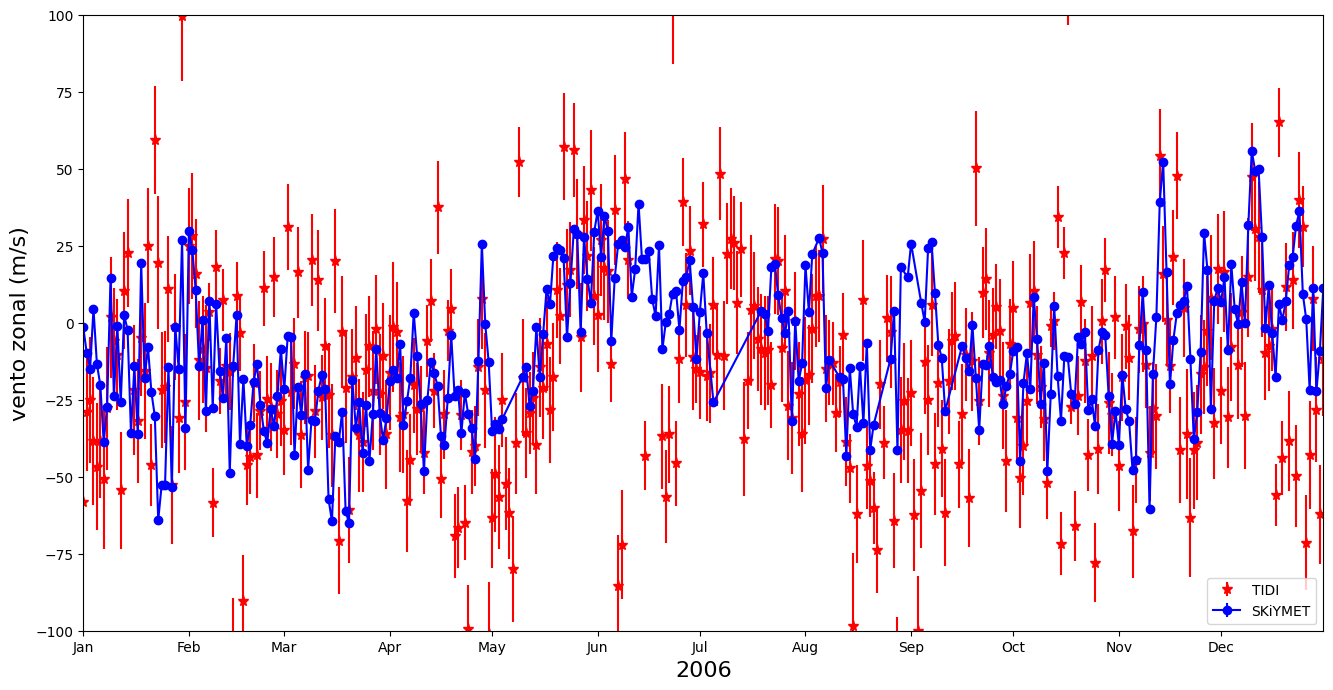

In [143]:
multiplot_errorbars_winds(df, '2006', 'zonal', 'comparacao_tidi_skiymet_zonal_2006')